
# Predictive Maintenance Analysis  
Proyek ini bertujuan untuk menganalisis data performa mesin dan memahami faktor-faktor yang dapat menyebabkan kegagalan mesin.  
Analisis ini dapat membantu perusahaan dalam melakukan perawatan mesin secara preventif (maintenance sebelum terjadi kerusakan).

## 1. Import Data & Library  
Pada tahap ini kita akan mengimpor library yang dibutuhkan serta membaca dataset `predictive_maintenance.csv`.  
Dataset ini berisi data sensor mesin seperti suhu, kelembaban, getaran, dan status kegagalan mesin.

In [ ]:
# Import library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Upload file csv yang akan dianalisis
from google.colab import files
uploaded = files.upload()

#membaca file csv yamg sudah diupload dan menmapilkan 5 baris pertama
df = pd.read_csv("predictive_maintenance.csv")
print(df.head())

Saving predictive_maintenance.csv to predictive_maintenance.csv
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


# Predictive Maintenance Analysis  

## Insight Awal  
Dataset ini berisi informasi kondisi mesin yang digunakan untuk memprediksi **kegagalan (failure)** pada mesin.  
Setiap baris data mewakili satu instance mesin dengan beberapa fitur seperti:  

- **Suhu (temperature)**, **kelembaban (humidity)**, **vibration**, **pressure**, dll.  
- Informasi apakah mesin mengalami **kegagalan (failure)** atau **tidak**.  

Tujuan analisis ini adalah:  
1. Memahami pola kondisi mesin berdasarkan data sensor.  
2. Mengidentifikasi faktor utama yang mempengaruhi kegagalan mesin.  
3. Menyusun insight yang bisa dipakai untuk **pencegahan kerusakan**.

## 2. Eksplorasi Awal Dataset  
Langkah awal adalah memahami struktur data:  
- Jumlah baris & kolom  
- Tipe data pada setiap kolom  
- Apakah ada missing value  
- Contoh 5 baris pertama data

In [ ]:
# Cek missing values
print("\nJumlah Missing Values per Kolom:")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)
# Info struktur data
df.info()


Jumlah Missing Values per Kolom:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target    

### Insight

- Tidak ada missing values pada setiap kolom ✅ (semua bernilai 0).
- Dataset terdiri dari `n` baris dan `m` kolom (lihat hasil `df.info()`).
- Kolom terbagi menjadi:
  - **Numerik**: suhu, kecepatan putaran, torque, umur mesin, dll.
  - **Kategorikal**: jenis kegagalan (failure type), status mesin, dll.
- Kesimpulan: dataset sudah cukup bersih sehingga bisa langsung masuk ke tahap eksplorasi tanpa perlu pembersihan tambahan.

## 3. Analisis Distribusi Variabel  

Pada tahap ini kita akan melihat distribusi beberapa variabel penting dalam dataset, yaitu:  
- **Air temperature [K]**  
- **Process temperature [K]**  
- **Rotational speed [rpm]**  
- **Torque [Nm]**  
- **Tool wear [min]**  
- **Failure Type**  

Tujuannya adalah untuk memahami bagaimana data tersebar, serta melihat apakah ada pola yang menonjol pada mesin yang mengalami kegagalan dibandingkan dengan yang tidak gagal.

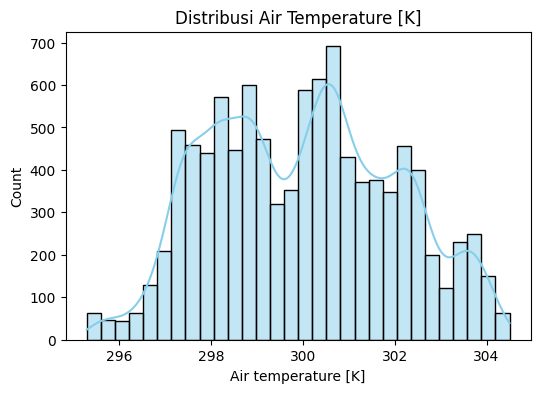

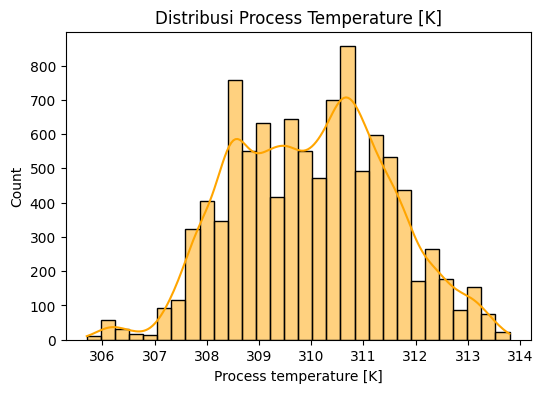

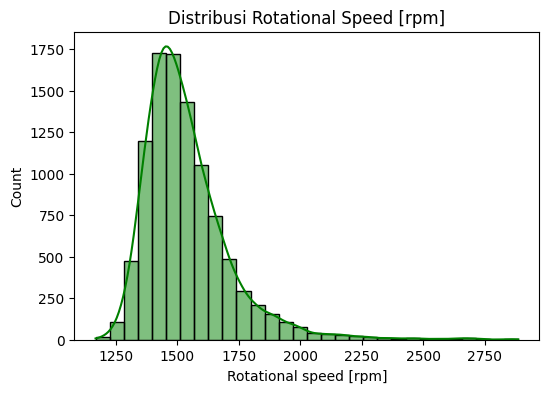

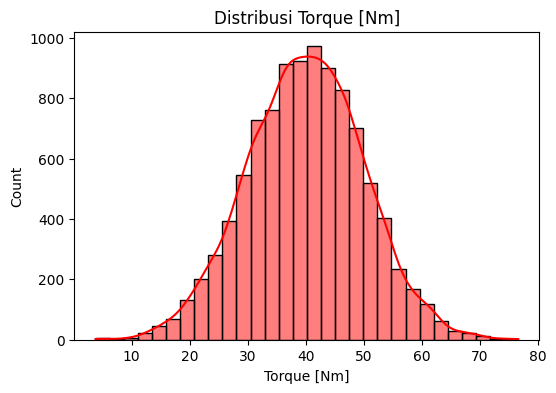

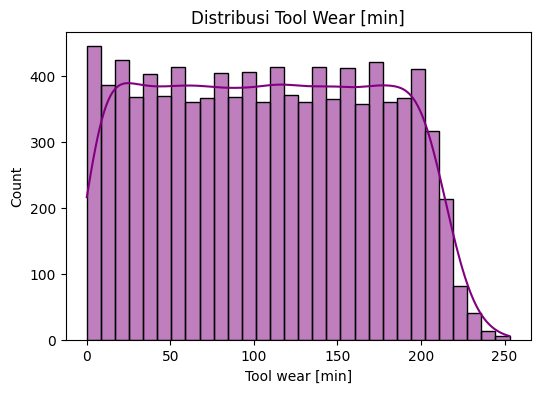

/tmp/ipython-input-660534067.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Failure Type", order=df["Failure Type"].value_counts().index, palette="Set2")


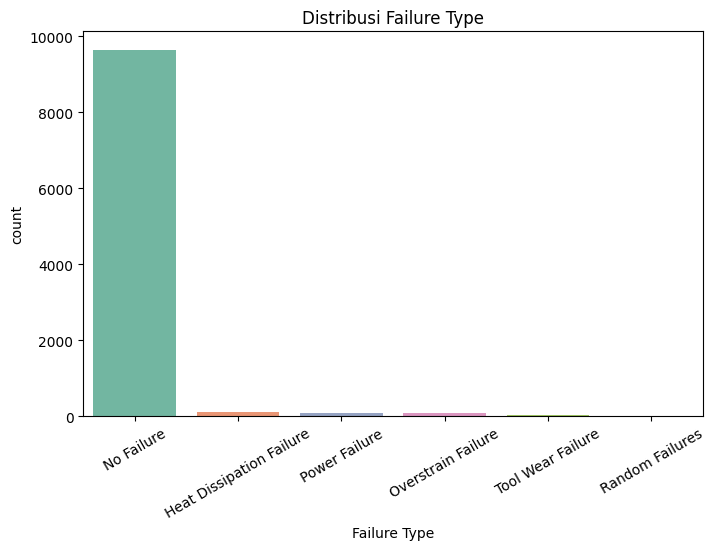

In [ ]:

# Distribusi Air Temperature
plt.figure(figsize=(6,4))
sns.histplot(df["Air temperature [K]"], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Air Temperature [K]")
plt.show()

# Distribusi Process Temperature
plt.figure(figsize=(6,4))
sns.histplot(df["Process temperature [K]"], bins=30, kde=True, color="orange")
plt.title("Distribusi Process Temperature [K]")
plt.show()

# Distribusi Rotational Speed
plt.figure(figsize=(6,4))
sns.histplot(df["Rotational speed [rpm]"], bins=30, kde=True, color="green")
plt.title("Distribusi Rotational Speed [rpm]")
plt.show()

# Distribusi Torque
plt.figure(figsize=(6,4))
sns.histplot(df["Torque [Nm]"], bins=30, kde=True, color="red")
plt.title("Distribusi Torque [Nm]")
plt.show()

# Distribusi Tool Wear
plt.figure(figsize=(6,4))
sns.histplot(df["Tool wear [min]"], bins=30, kde=True, color="purple")
plt.title("Distribusi Tool Wear [min]")
plt.show()

# Distribusi Failure Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Failure Type", order=df["Failure Type"].value_counts().index, palette="Set2")
plt.title("Distribusi Failure Type")
plt.xticks(rotation=30)
plt.show()

## 4. Analisis Distribusi Variabel

Pada tahap ini kita melihat distribusi beberapa variabel utama untuk memahami pola data.

### Insight:
1. **Air Temperature [K]**
   - Distribusi relatif normal.
   - Sebagian besar mesin beroperasi pada 295–305 K.

2. **Process Temperature [K]**
   - Distribusi normal dengan rentang lebih sempit.
   - Mayoritas data berada pada 305–315 K, sesuai kontrol proses industri.

3. **Rotational Speed [rpm]**
   - Distribusi lebar dengan puncak pada 1500–2000 rpm.
   - Ada nilai tinggi yang mungkin perlu perhatian khusus.

4. **Torque [Nm]**
   - Distribusi miring ke kanan (positif skew).
   - Sebagian besar mesin bekerja di bawah 40 Nm, outlier bisa menandakan kondisi tidak normal.

5. **Tool Wear [min]**
   - Distribusi hampir seragam (uniform).
   - Menunjukkan variasi penggunaan alat, dari baru hingga aus.

6. **Failure Type**
   - Mayoritas data = *No Failure*.
   - Kegagalan terbanyak: **Heat Dissipation Failure** & **Overstrain Failure**.
   - Jenis kegagalan lain relatif jarang.

### Kesimpulan Sementara:
- Dataset didominasi mesin normal.
- Variabel **torque** dan **rotational speed** penting untuk analisis lanjut karena variasinya besar.
- Distribusi failure menunjukkan fokus utama pada 2 jenis kegagalan.

## 4. Analisis Korelasi  
Langkah berikutnya adalah menghitung korelasi antar variabel numerik untuk melihat faktor-faktor apa saja yang berkaitan dengan kegagalan mesin.  
Visualisasi heatmap akan membantu memperjelas hubungan antar variabel.

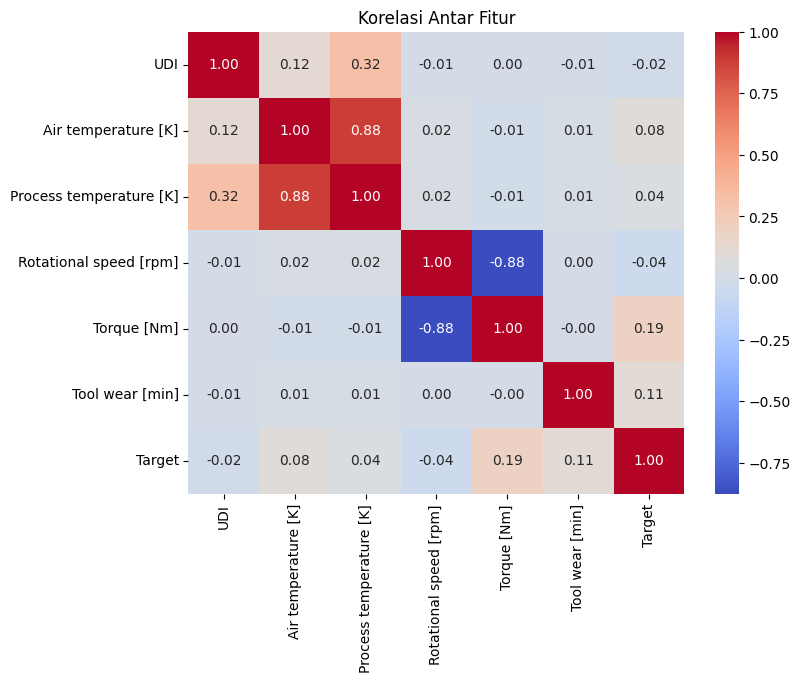

In [ ]:
# Hitung korelasi
corr = df.corr(numeric_only=True)

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

### Insight dari Heatmap:
- **Air Temperature** dan **Process Temperature** memiliki korelasi sangat kuat (0.88). Artinya suhu udara dan suhu proses saling terkait erat — kemungkinan karena mesin bekerja dalam lingkungan tertutup sehingga kenaikan suhu udara langsung memengaruhi suhu proses.  
- **Rotational Speed** dan **Torque** berkorelasi negatif sangat kuat (-0.88). Artinya, semakin tinggi kecepatan putaran mesin, semakin rendah torsi yang dibutuhkan, dan sebaliknya. Ini wajar secara mekanis.  
- **Target (gagal atau tidak)** tidak punya korelasi kuat dengan satu variabel tunggal. Nilai korelasi dengan suhu, kecepatan, torsi, maupun tool wear semuanya rendah (< 0.2).  

### Kesimpulan Awal:
- Tidak ada satu faktor tunggal yang dominan memicu kegagalan mesin.  
- Hubungan kegagalan mesin dengan variabel input bersifat **kompleks** dan mungkin melibatkan kombinasi beberapa faktor (multivariat).  
- Analisis lebih lanjut (misalnya distribusi kegagalan, jenis kegagalan, atau model prediktif) diperlukan untuk memahami faktor penyebab kegagalan mesin secara lebih jelas.

## 5. Analisis Kegagalan Mesin  
Di sini kita akan fokus pada kolom `Failure Type` untuk mengetahui:  
- Jenis kegagalan mesin yang paling sering terjadi  
- Faktor utama yang berhubungan dengan tiap kegagalan  

Visualisasi akan ditampilkan dalam bentuk barplot atau countplot.

Jumlah mesin yang mengalami kegagalan: 339

Proporsi jenis kegagalan:
Failure Type
Heat Dissipation Failure    32.183908
Power Failure               27.298851
Overstrain Failure          22.413793
Tool Wear Failure           12.931034
Random Failures              5.172414
Name: proportion, dtype: float64


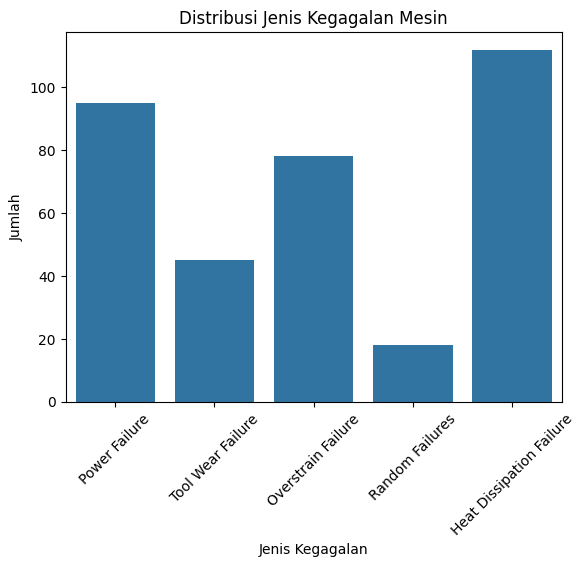

In [ ]:
# Pisahkan data mesin gagal dan berhasil
mesin_gagal = df[df["Target"] == 1]
mesin_berhasil = df[df["Target"] == 0]

# Hitung total mesin gagal
jumlah_gagal = mesin_gagal.shape[0]
print("Jumlah mesin yang mengalami kegagalan:", jumlah_gagal)

# Tampilkan proporsi jenis kegagalan (selain 'No Failure')
print("\nProporsi jenis kegagalan:")
failure_props = df[df['Failure Type'] != 'No Failure']['Failure Type'].value_counts(normalize=True) * 100
print(failure_props)


# Visualisasi jenis kegagalan
sns.countplot(data=df[df['Failure Type'] != 'No Failure'], x='Failure Type')
plt.title('Distribusi Jenis Kegagalan Mesin')
plt.xticks(rotation=45)
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kegagalan')
plt.show()

In [ ]:
# Hitung jumlah kegagalan berdasarkan Type
jumlah_gagal_per_type = mesin_gagal['Type'].value_counts()

# Hitung persentase kegagalan per Type
persentase_gagal_per_type = mesin_gagal['Type'].value_counts(normalize=True) * 100

print("Jumlah kegagalan per Type:")
print(jumlah_gagal_per_type)

print("\nPersentase kegagalan per Type:")
print(persentase_gagal_per_type)

Jumlah kegagalan per Type:
Type
L    235
M     83
H     21
Name: count, dtype: int64

Persentase kegagalan per Type:
Type
L    69.321534
M    24.483776
H     6.194690
Name: proportion, dtype: float64


## 6. Analisis Kegagalan Mesin  

###  Jumlah Mesin Gagal  
- Dataset menunjukkan total mesin yang mengalami kegagalan sebanyak **339 unit**.  
- Informasi ini penting untuk memahami skala masalah yang ada.  

###  Proporsi Jenis Kegagalan  
Distribusi jenis kegagalan (selain *No Failure*):   

- **Heat Dissipation Failure** : 32.18%
- **Power Failure**            : 27.29%
- **Overstrain Failure**       : 22.41%
- **Tool Wear Failure**.       : 12.93%
- **Random Failures**          : 5.17%

Visualisasi bar chart membantu mengidentifikasi **failure type yang paling sering terjadi**, yaitu *Heat Dissipation Failure* dan *Power Failure*.  

###  Kegagalan Berdasarkan Tipe Mesin  
Jumlah kegagalan per tipe mesin:  
- **Type L** : 235 unit (69.32%)  
- **Type M** : 83 unit (24.48%)  
- **Type H** : 21 unit (6.19%)  

Terlihat bahwa **mesin Type L** memiliki jumlah kegagalan paling tinggi.  

---

##  Insight Awal
1. Jumlah kegagalan mesin cukup signifikan (**339 kegagalan** dari total dataset).  
2. Jenis kegagalan terbanyak adalah *Heat Dissipation Failure* dan *Power Failure*.  
3. **Mesin Type L** lebih sering gagal dibanding tipe lain → indikasi potensi masalah atau butuh perawatan lebih intensif.

## 6. Insight & Kesimpulan  
Berdasarkan analisis, kita dapat menyimpulkan:  

- Maintenance Preventif : fokus pada sistem pendinginan dan listrik.

- Penggunaan Mesin : pastikan tidak overstrain dengan pemantauan beban kerja.

- Tool Management : tetapkan jadwal penggantian alat sebelum aus.

- Prioritas Tipe Mesin : arahkan investasi dan monitoring ke tipe mesin L dengan failure rate tertinggi.